### Group members: Tyler Blankenship, Kao Takahama, Tyler Selby, Zach Seitz, Safal Lamichhane 

### Due Date: 3/21/23

### real estate transaction .csv file
### 1) Create a grid of scatter plots with each one representing the sq_ft distribution in a single zipcode, please also include ticks, labels and legend in your plot


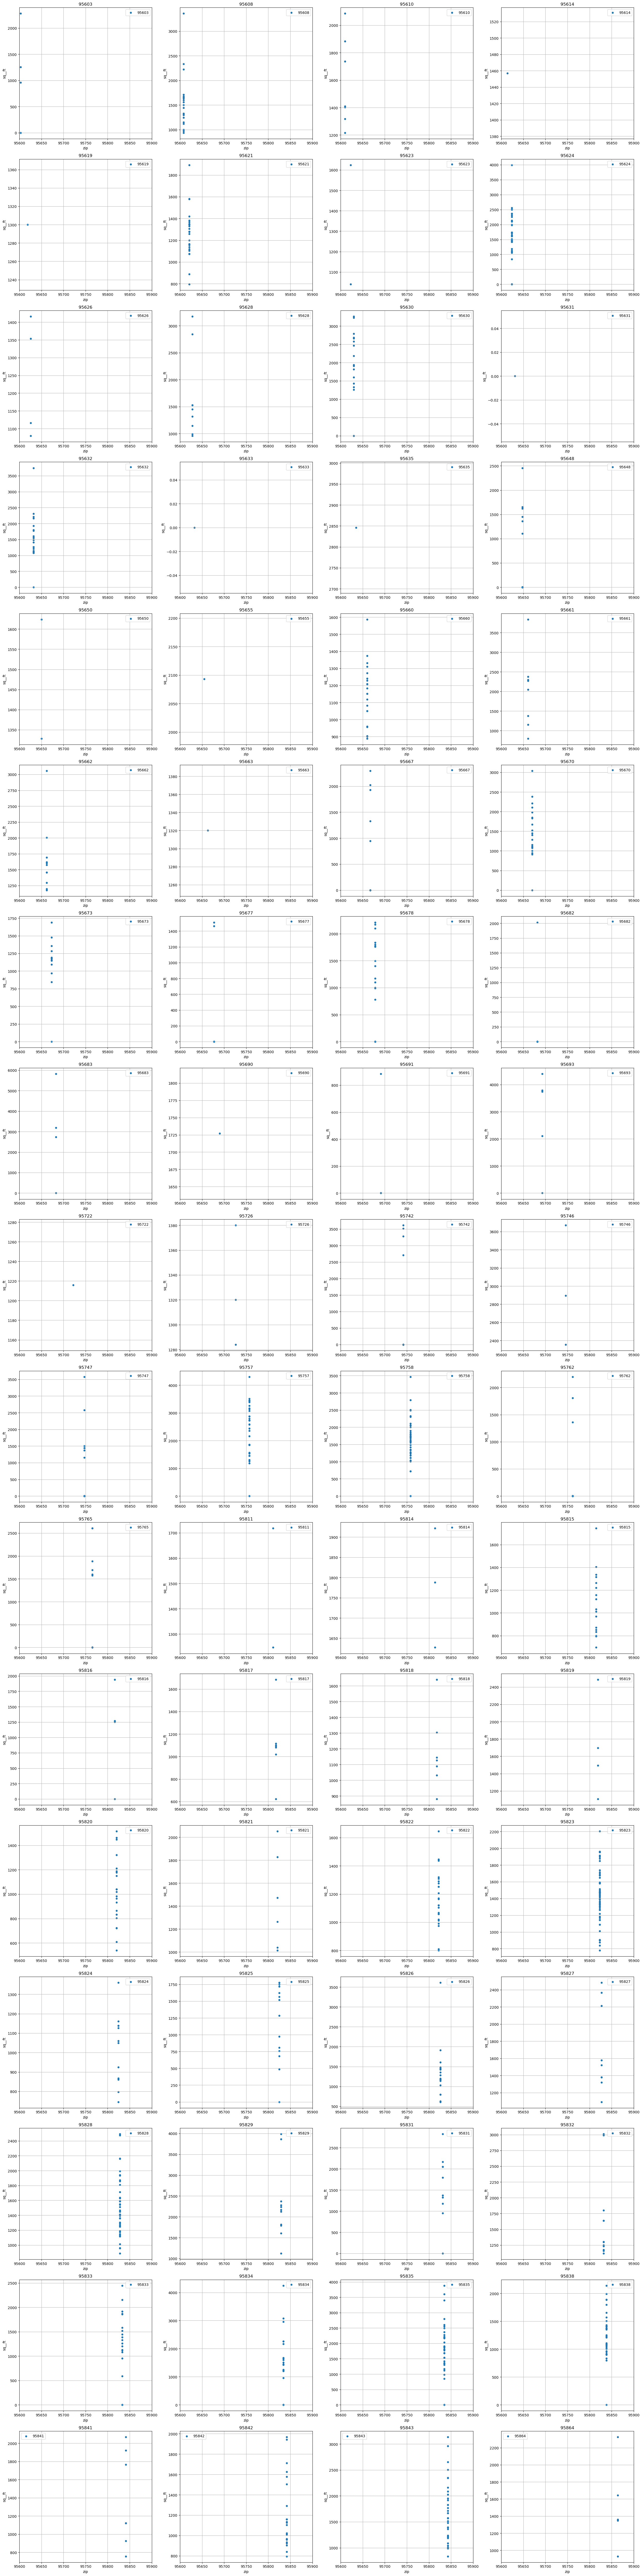

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Sacramentorealestatetransactions.csv')


grouped = df.groupby('zip')

fig, axs = plt.subplots(17, 4, figsize=(25, 100))


for (zip_code, group), ax in zip(grouped, axs.flatten()):
    group.plot(x='zip',
               y='sq__ft',
               kind='scatter',
               ax=ax,
               title=zip_code,
               legend=True,
               label=zip_code,
               grid=True,
               xlim = (95600, 95900)
              )    
    
fig.tight_layout()
plt.show()

### 2) Create a grid of scatter plots with each one representing the price distribution in a single zipcode, annotate the highest and lowest price ones for each category of real estate: condo, residential and multi-family, please also include ticks, labels and legend in your plot

### 3) Create a grid of bar plots with each one representing a single zipcode and in that zipcode the sq_ft distribution is grouped by the category of condo, residential and multi-family, please also include ticks, labels and legend in your plot

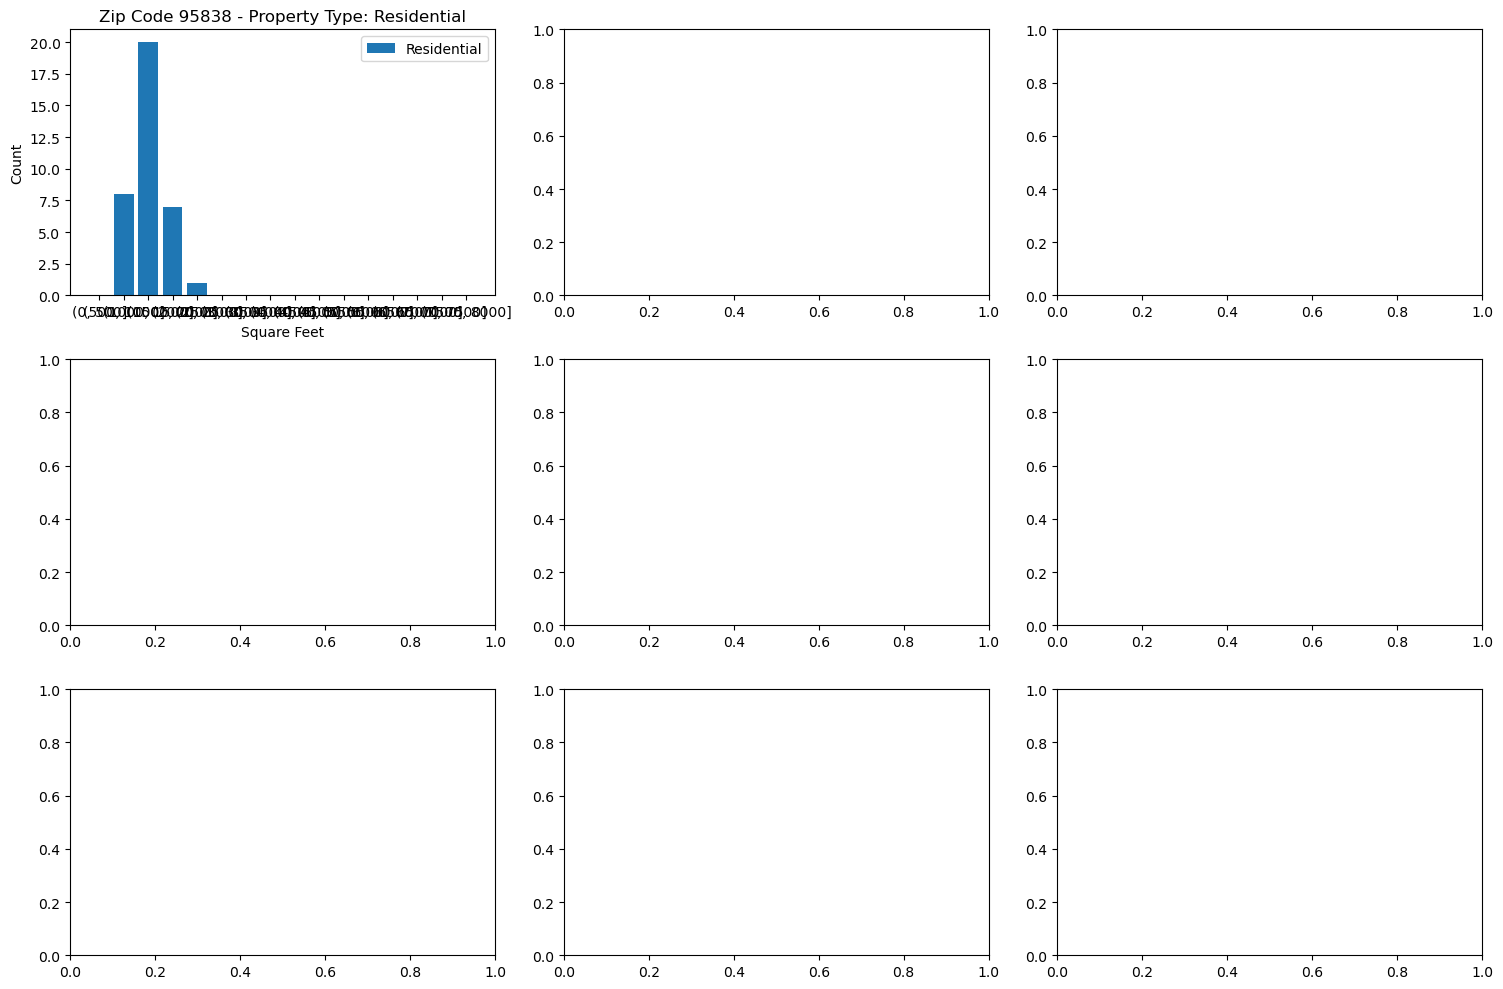

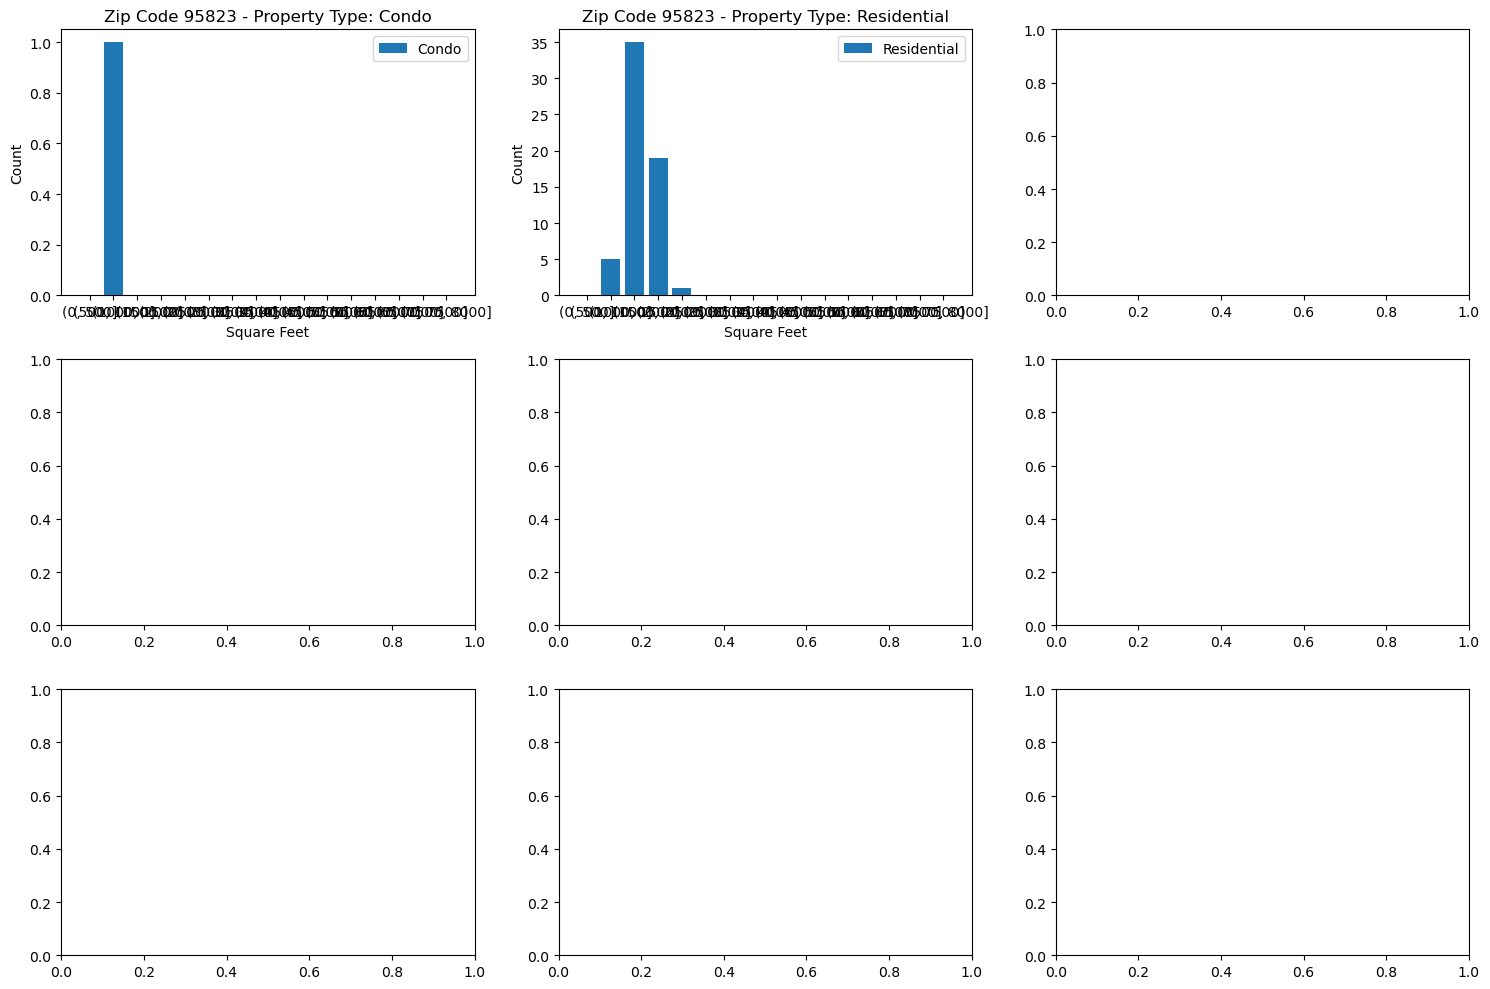

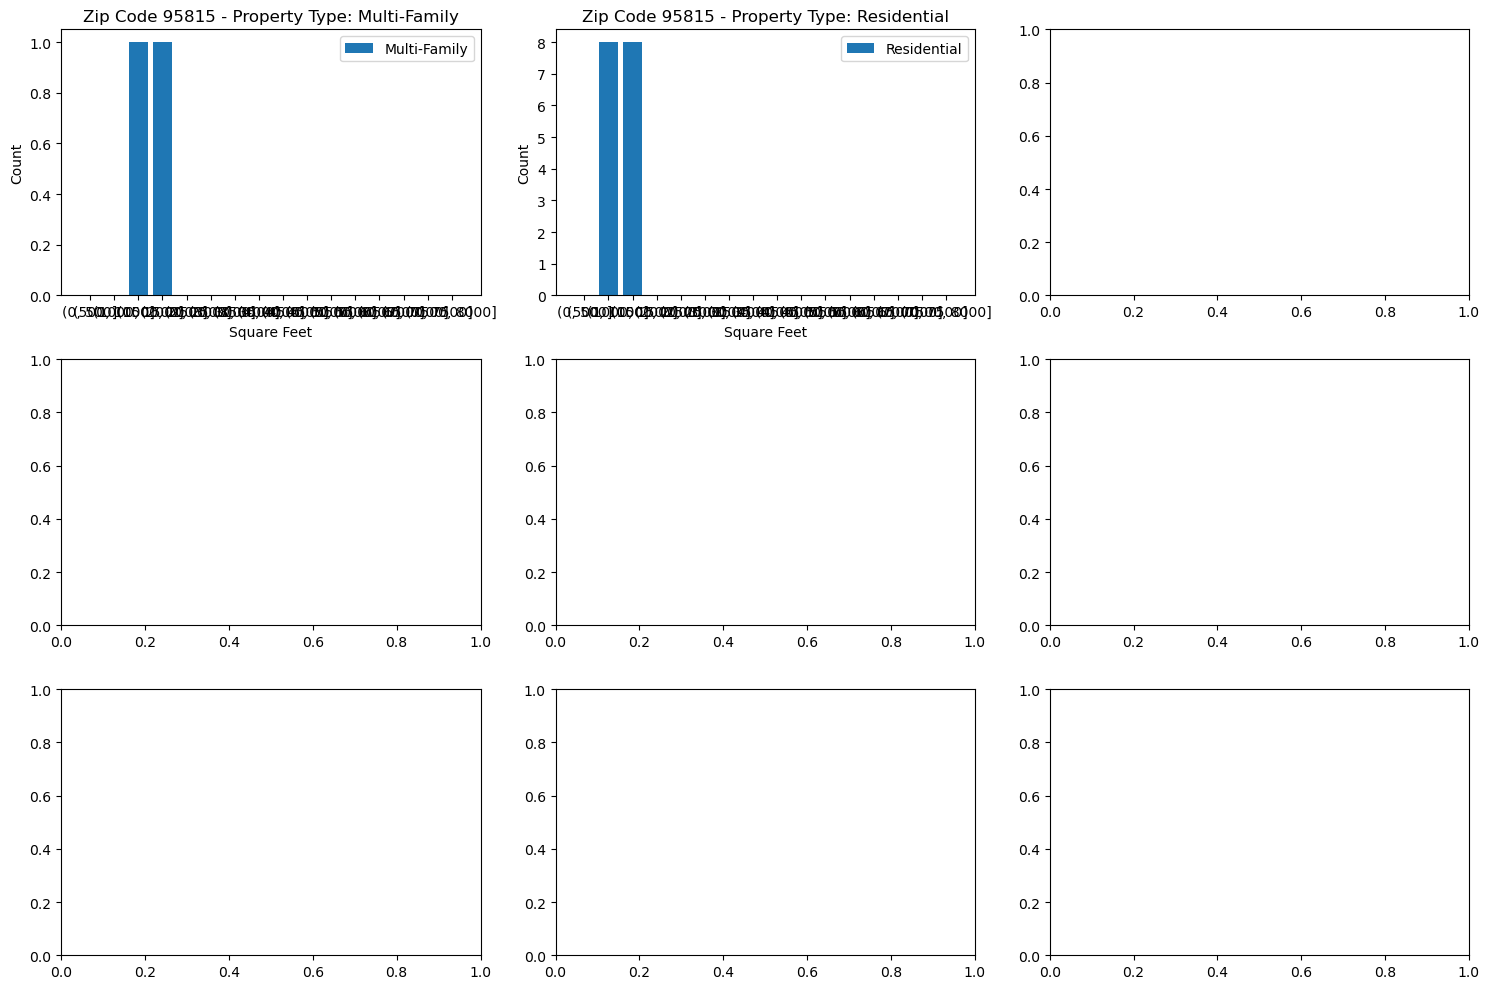

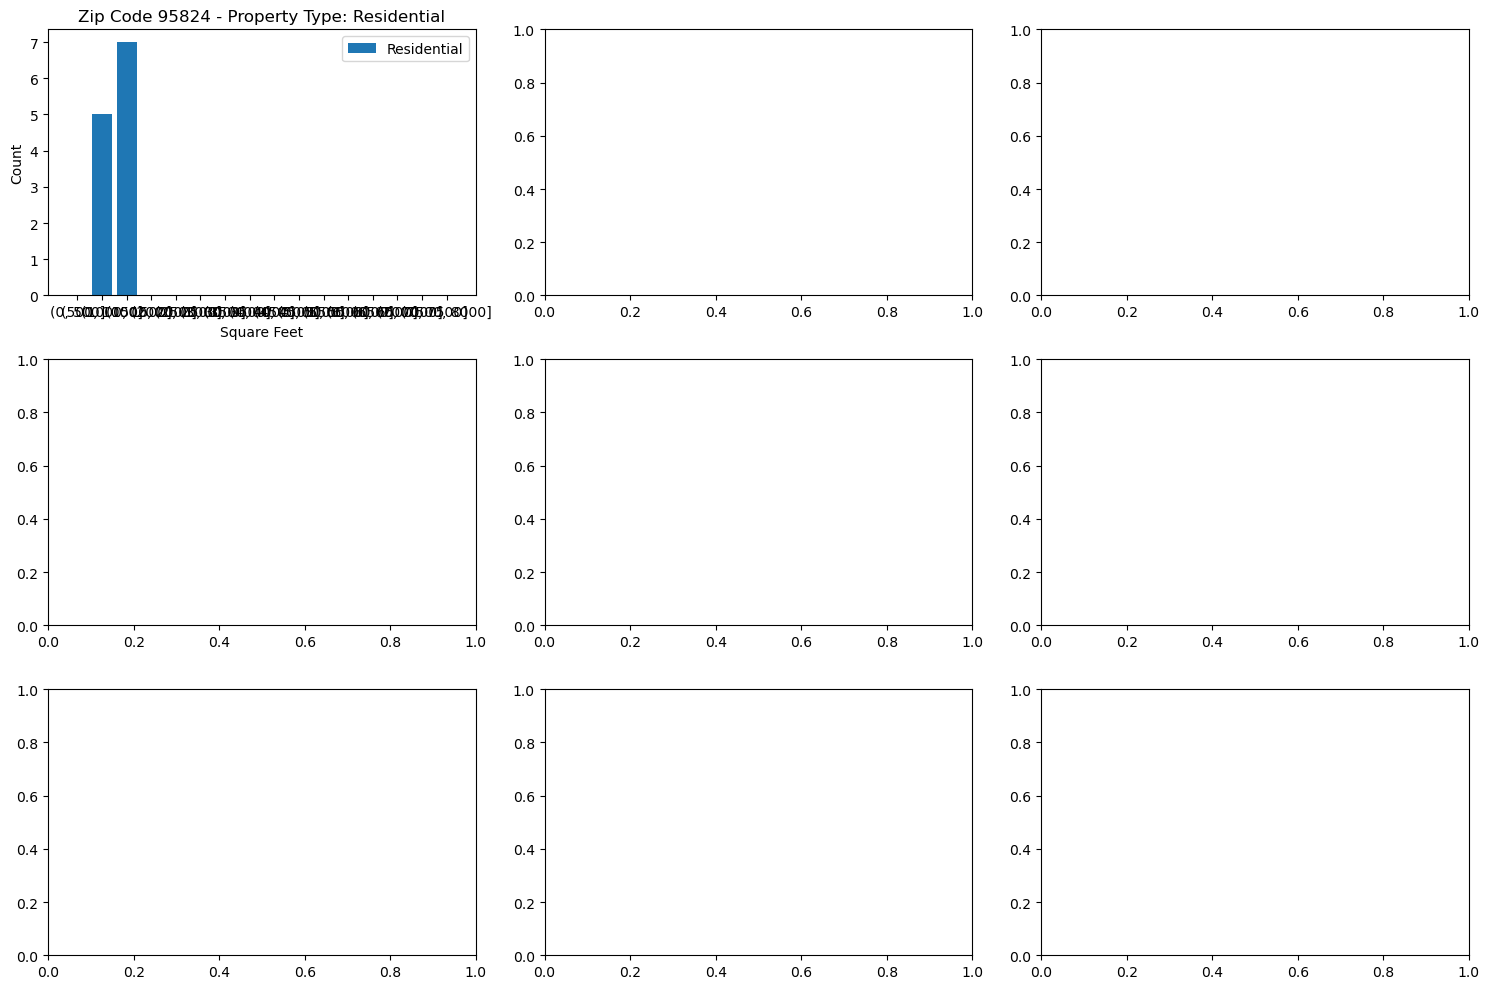

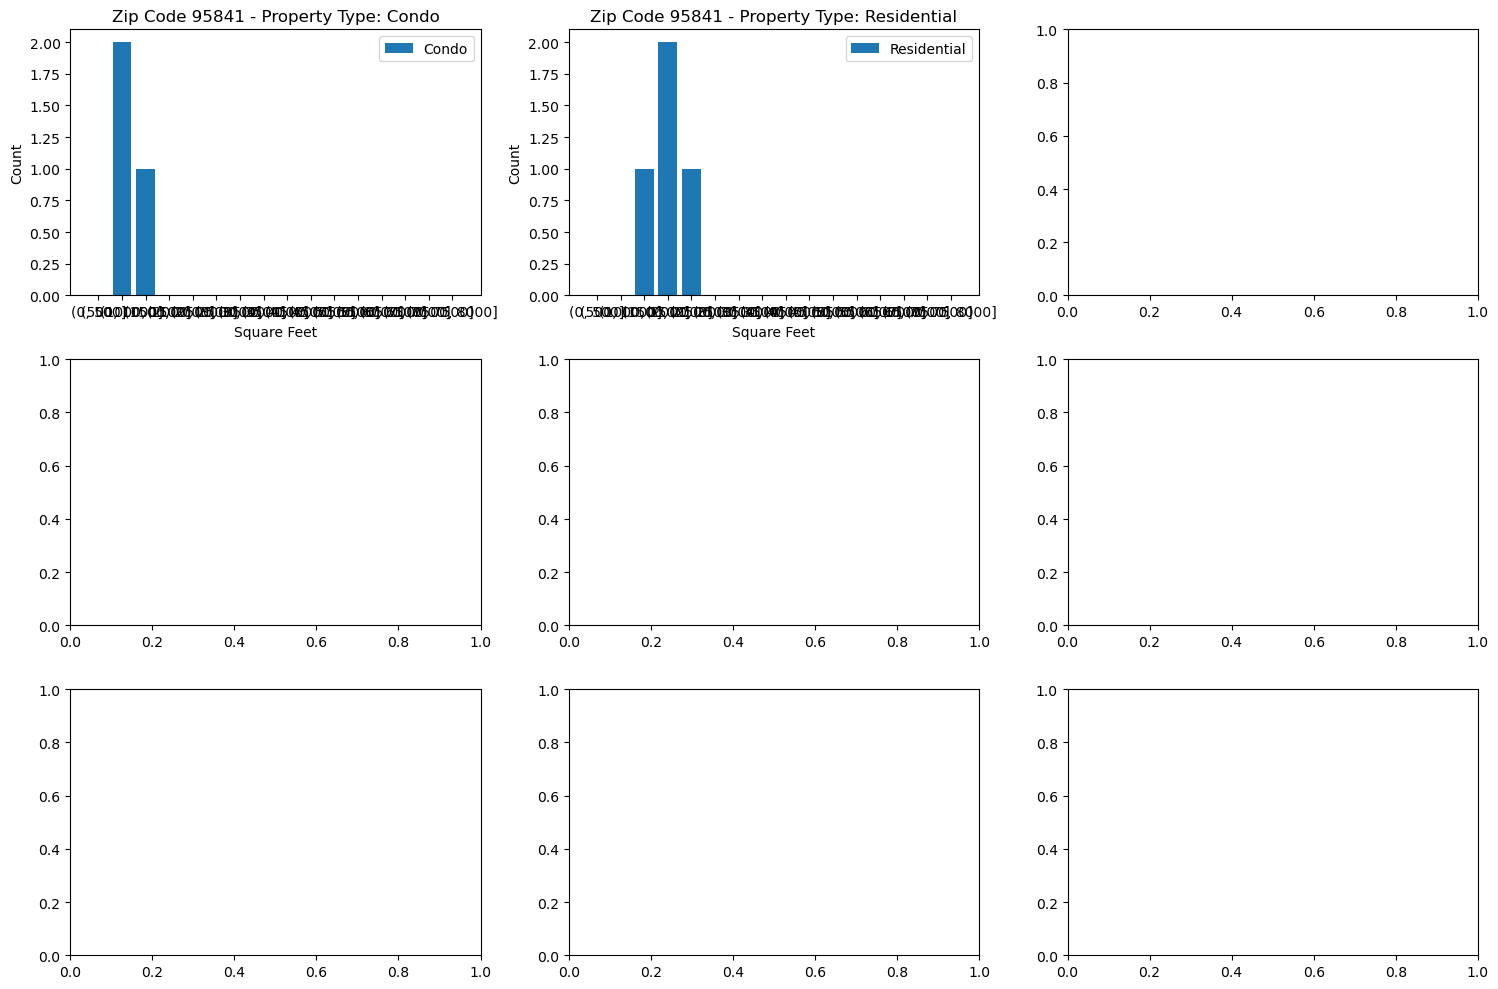

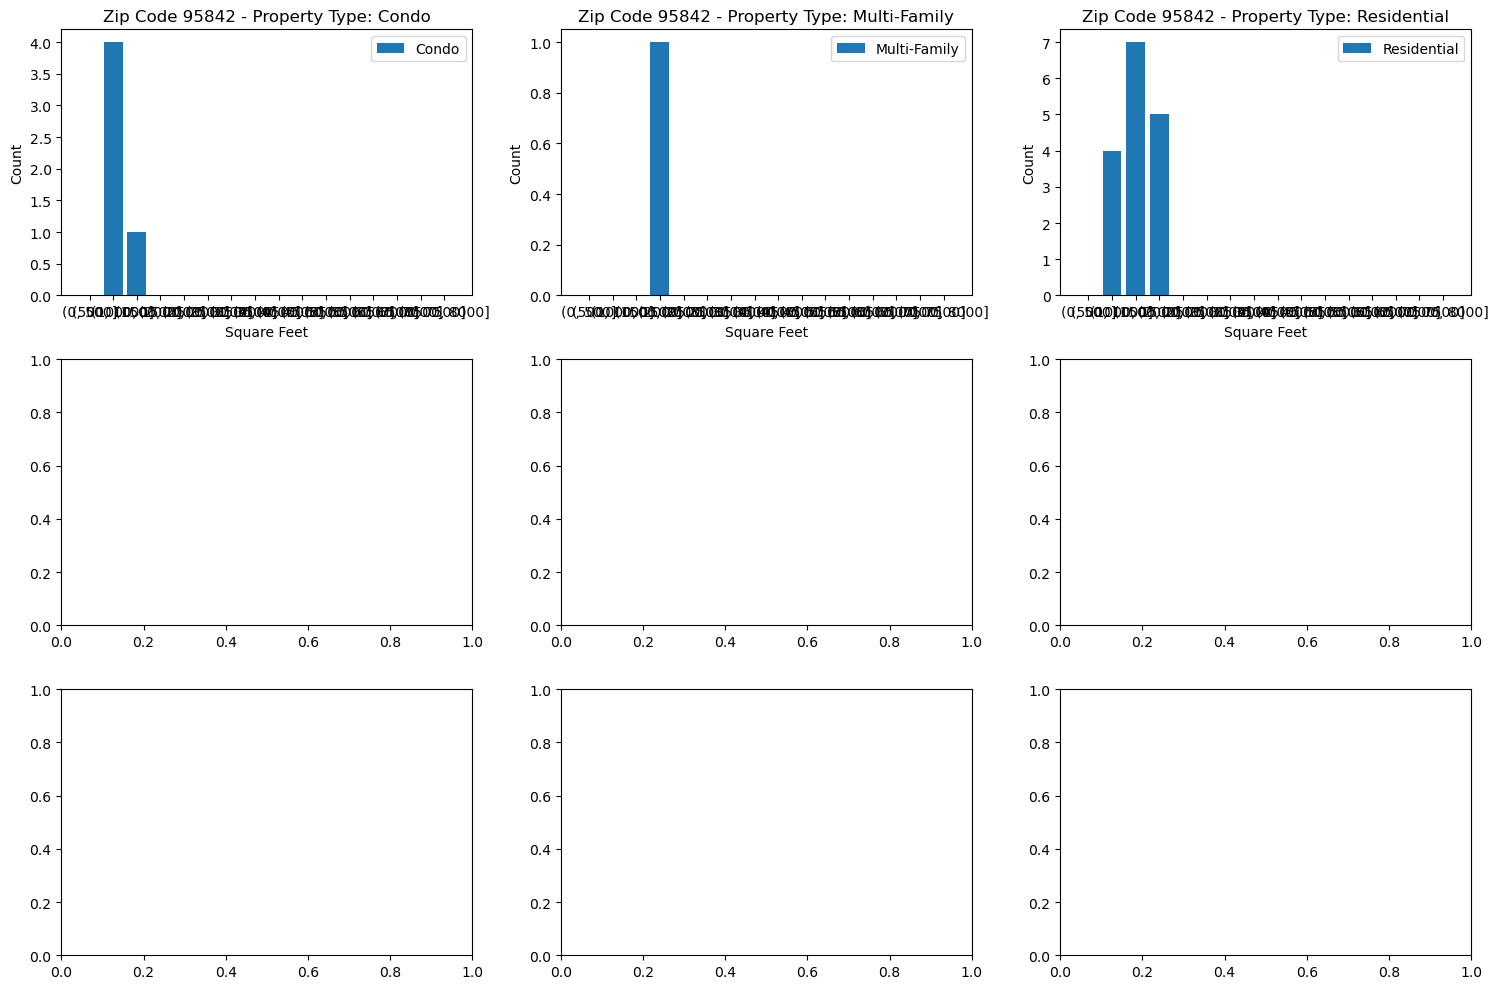

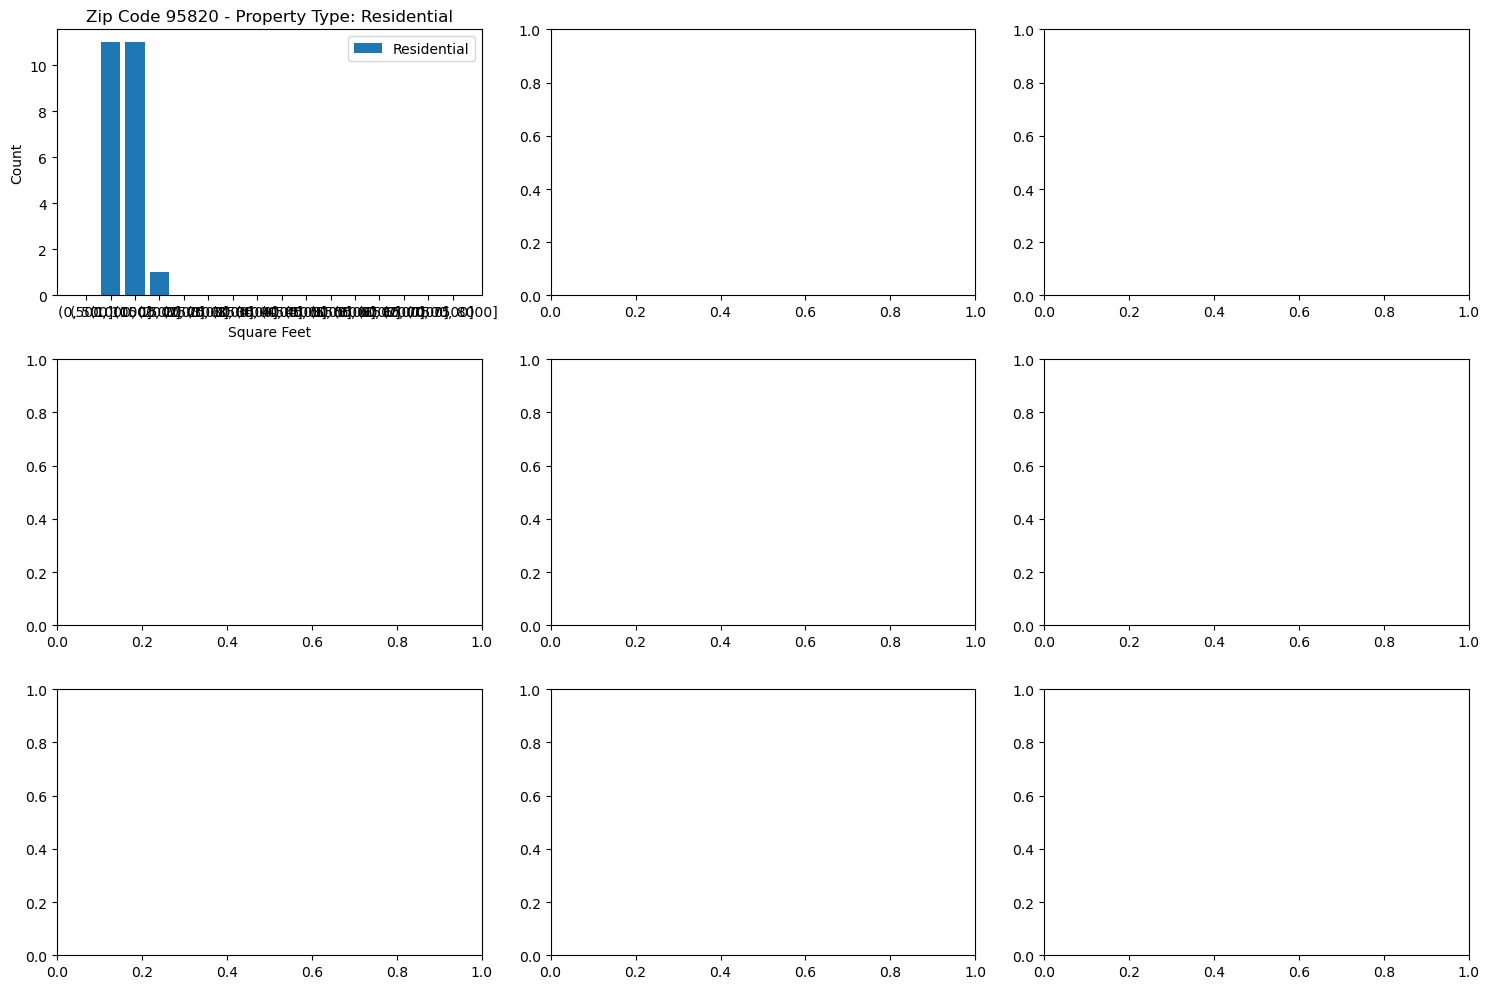

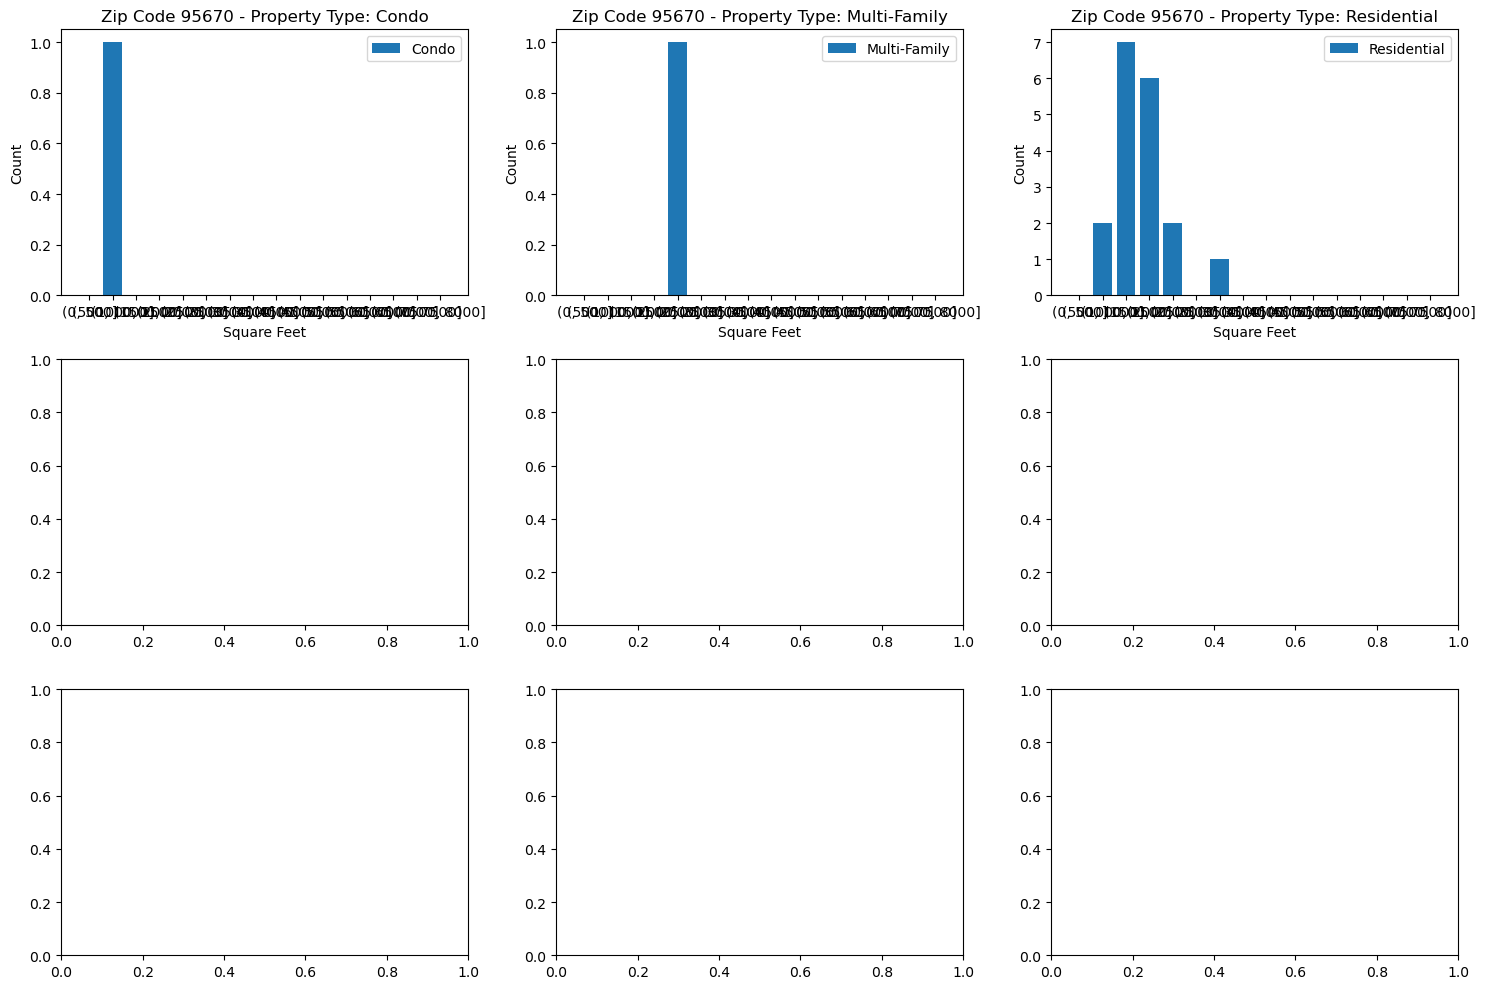

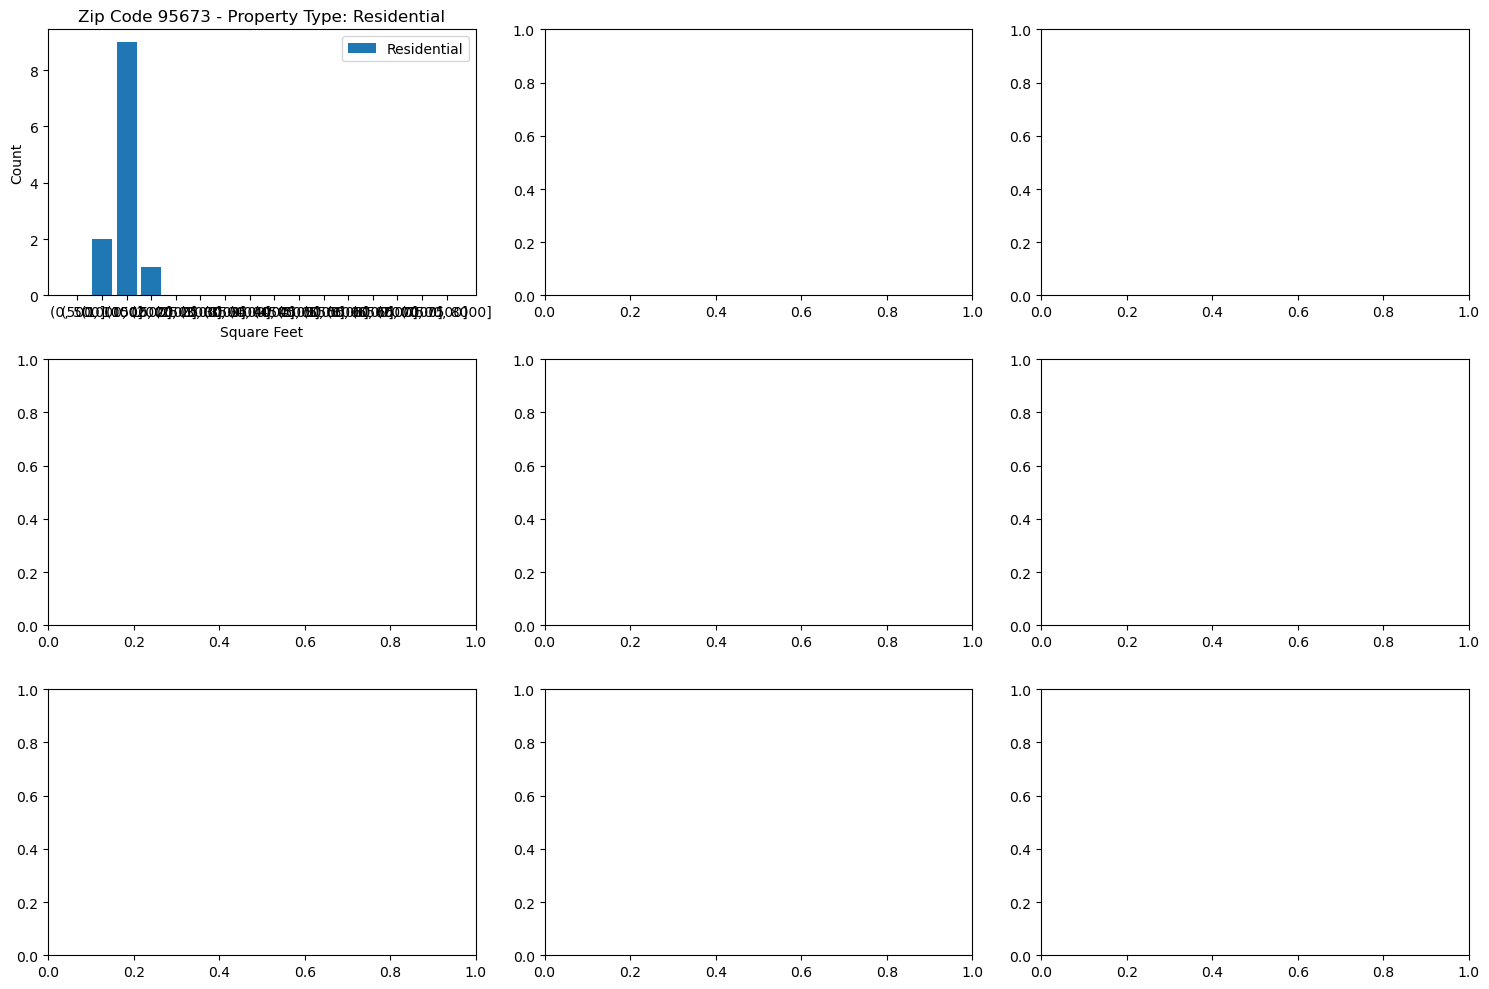

In [6]:
data = df

# Get the list of unique zip codes
zip_codes = data['zip'].unique()

# Set up the plot grid
n_rows = 3
n_cols = 3
grid_size = n_rows * n_cols

# Iterate over the zip codes and plot the sq_ft distributions grouped by property type
for i, zip_code in enumerate(zip_codes[:grid_size]):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

    # Get the data for the current zip code
    zip_data = data[data['zip'] == zip_code]

    # Group the data by property type and sq__ft
    grouped_data = zip_data.groupby(['type', pd.cut(zip_data['sq__ft'], bins=range(0, 8001, 500))])['sq__ft'].count().unstack(level=0)

    # Get the list of property types with data
    property_types = grouped_data.columns.dropna()

    # Iterate over the property types and plot the sq_ft distributions
    for j, property_type in enumerate(property_types):
        row = j // n_cols
        col = j % n_cols
        ax = axes[row, col]
        ax.bar(grouped_data[property_type].index.astype(str), grouped_data[property_type])
        ax.set_xlabel('Square Feet')
        ax.set_ylabel('Count')
        ax.set_title(f'Zip Code {zip_code} - Property Type: {property_type}')
        ax.legend([property_type])

    # Set the spacing between the plots
    plt.tight_layout()

    # Display the plot
    plt.show()

### 4) Create a grid of bar plots with each one representing a single zipcode and in that zipcode the price distribution is grouped by the category of condo, residential and multi-family, please also include ticks, labels and legend in your plot

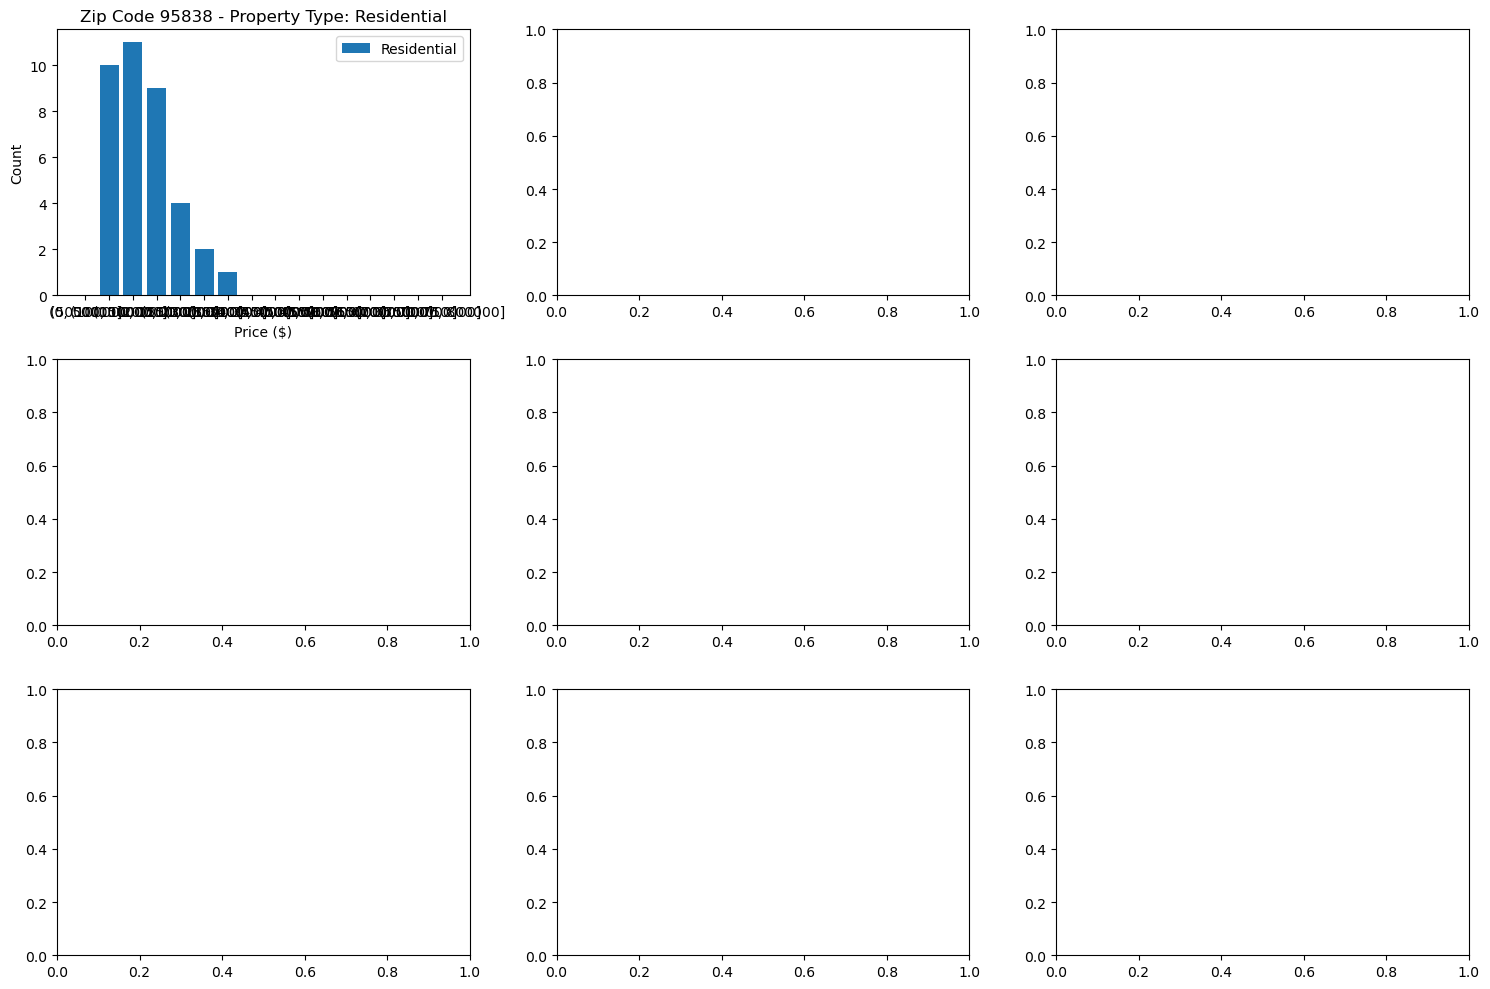

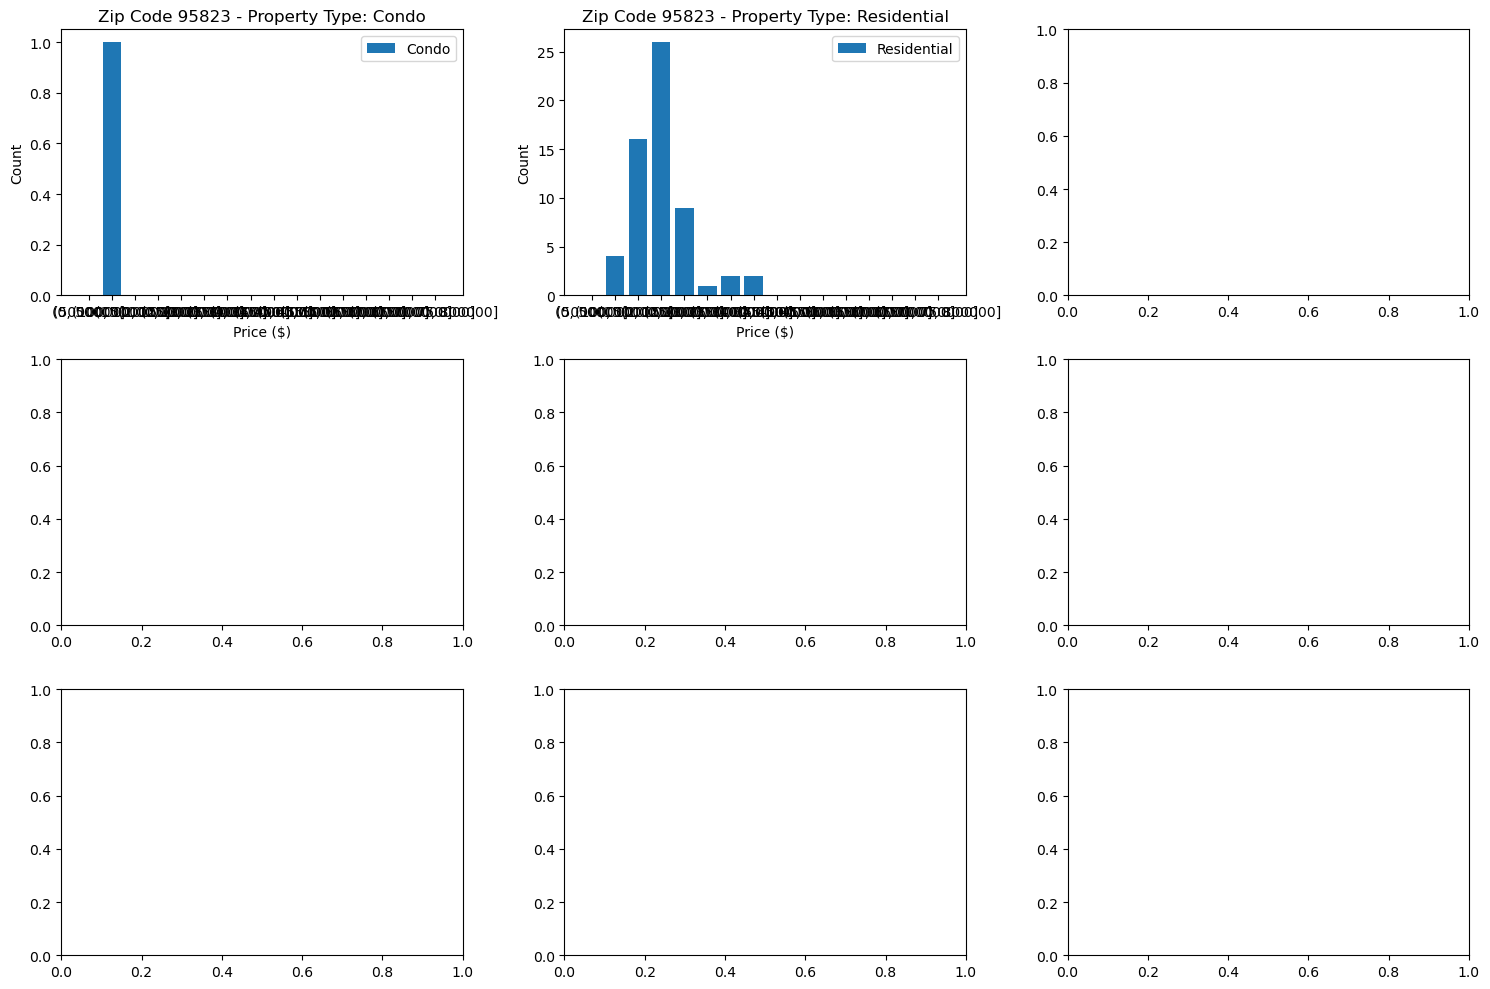

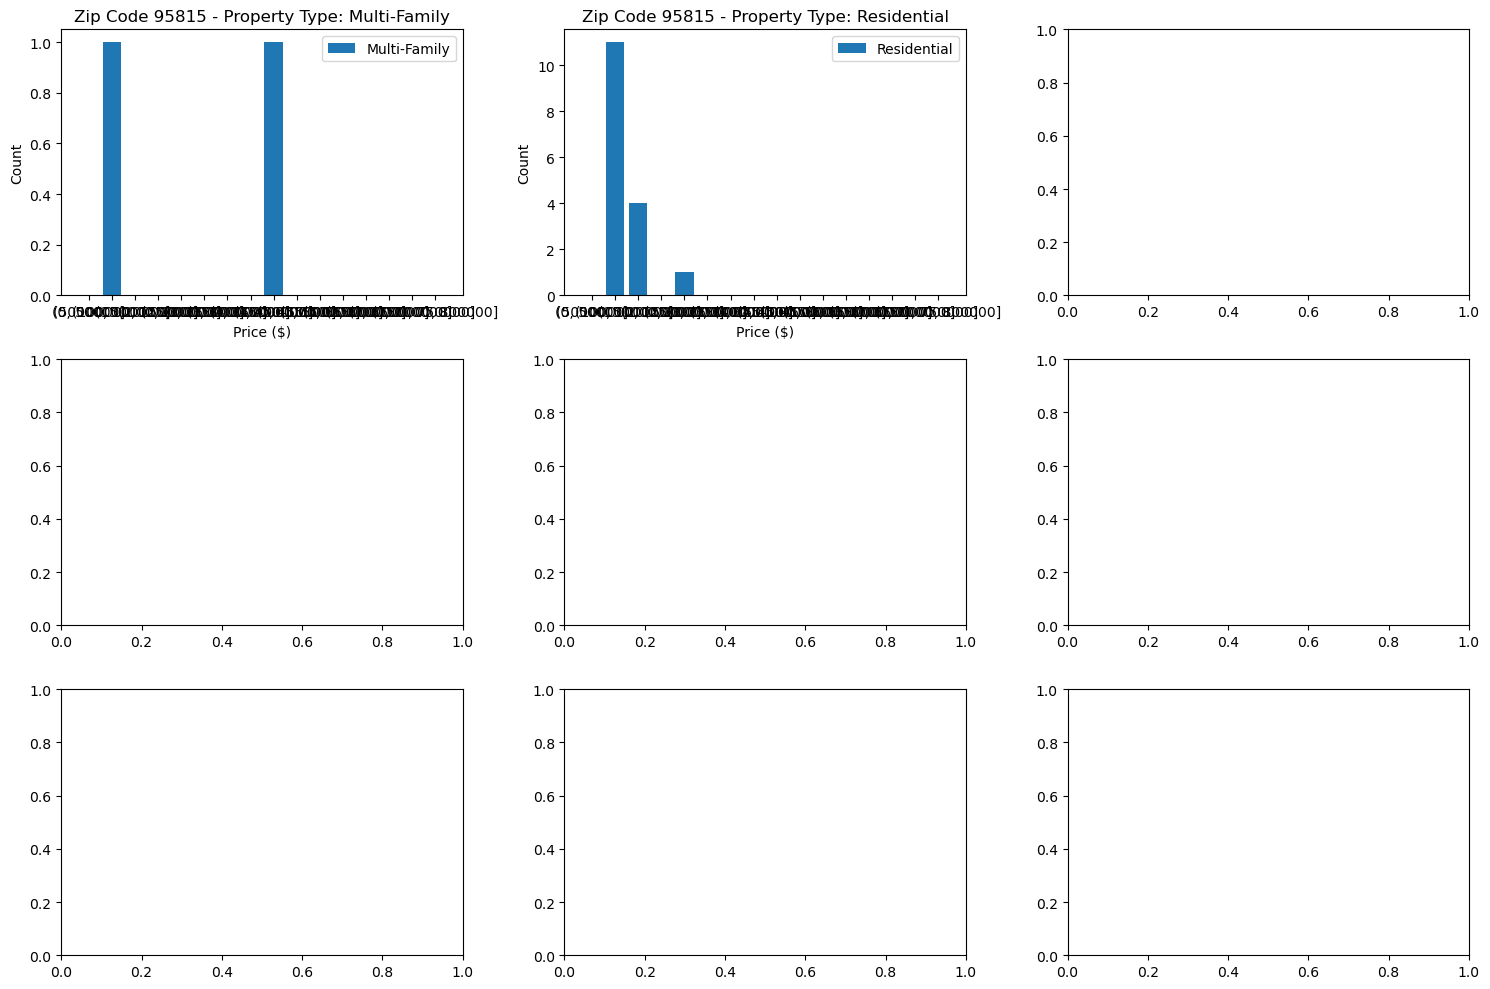

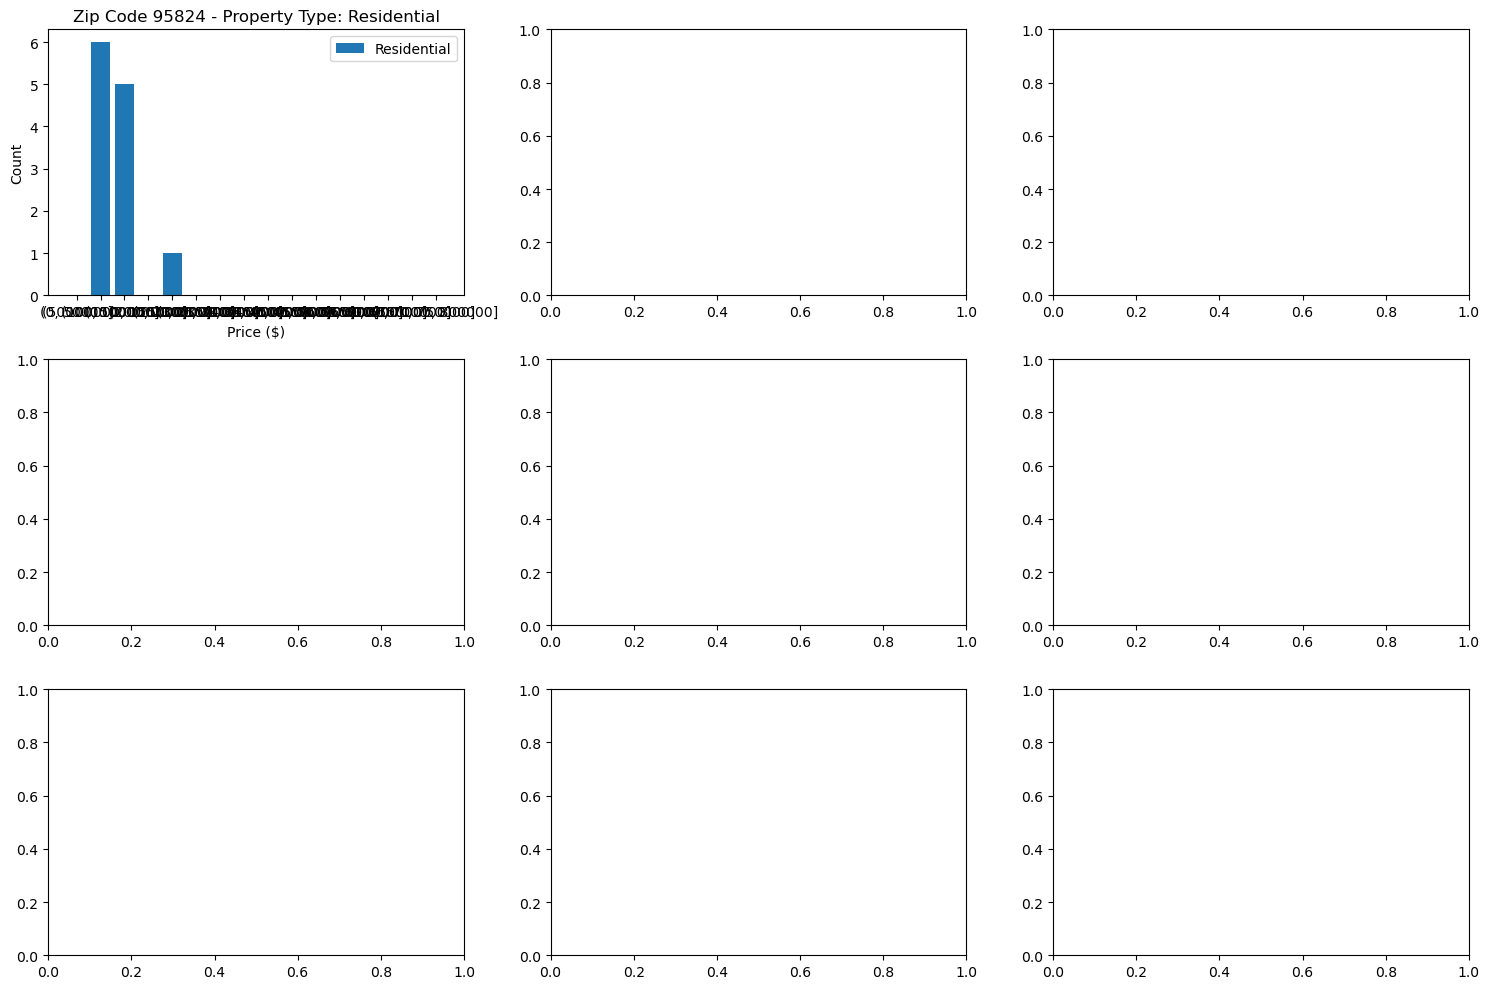

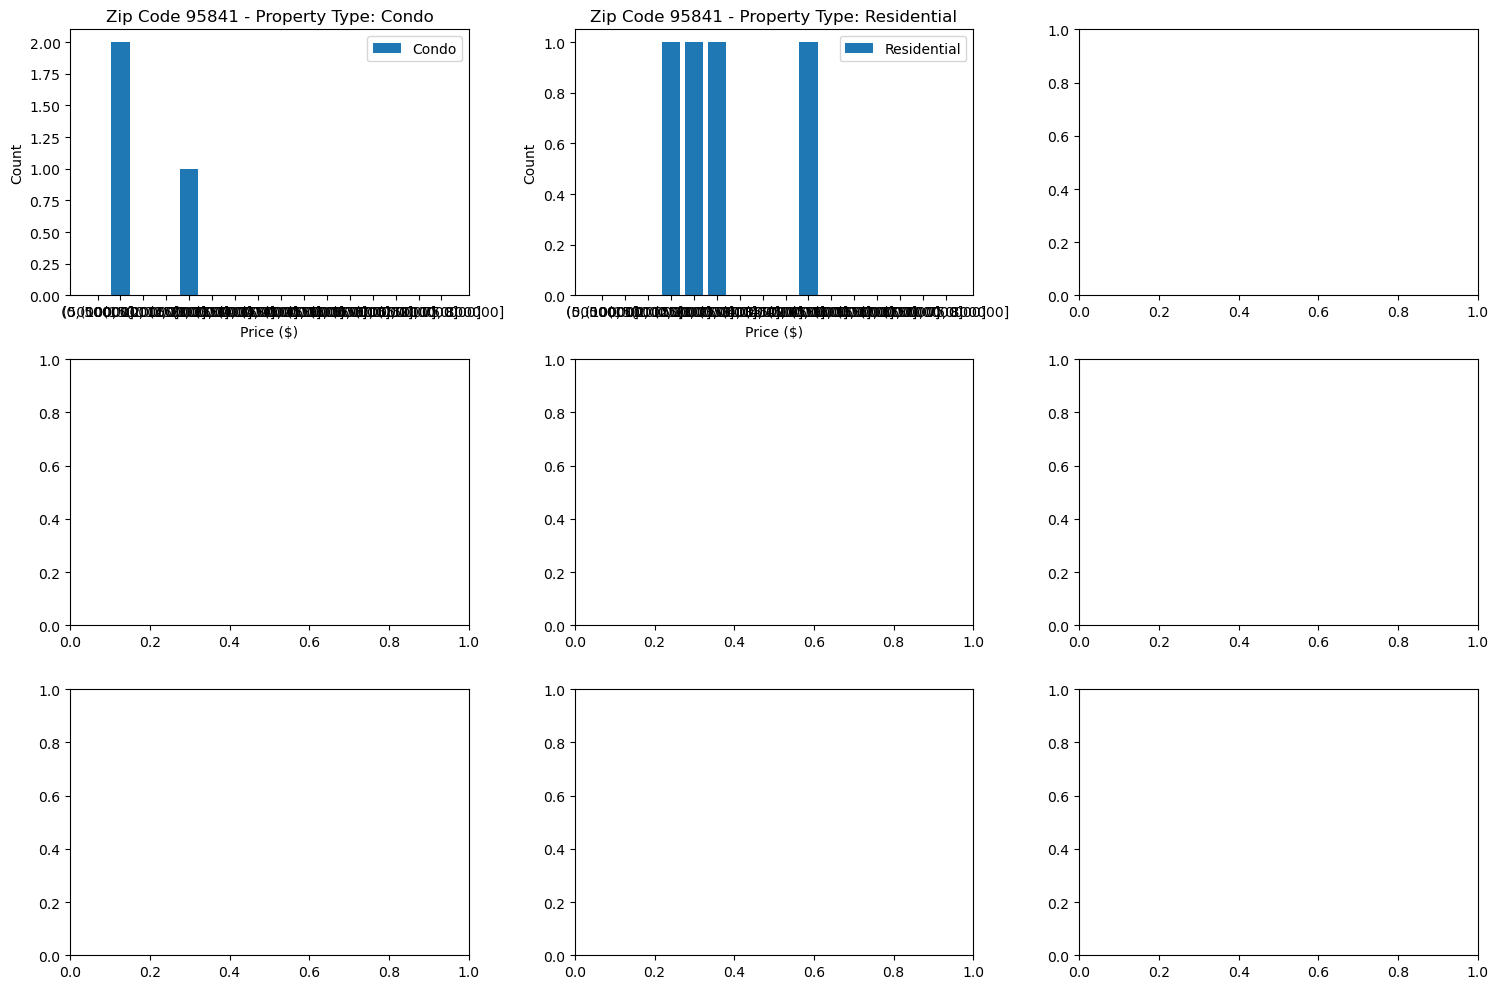

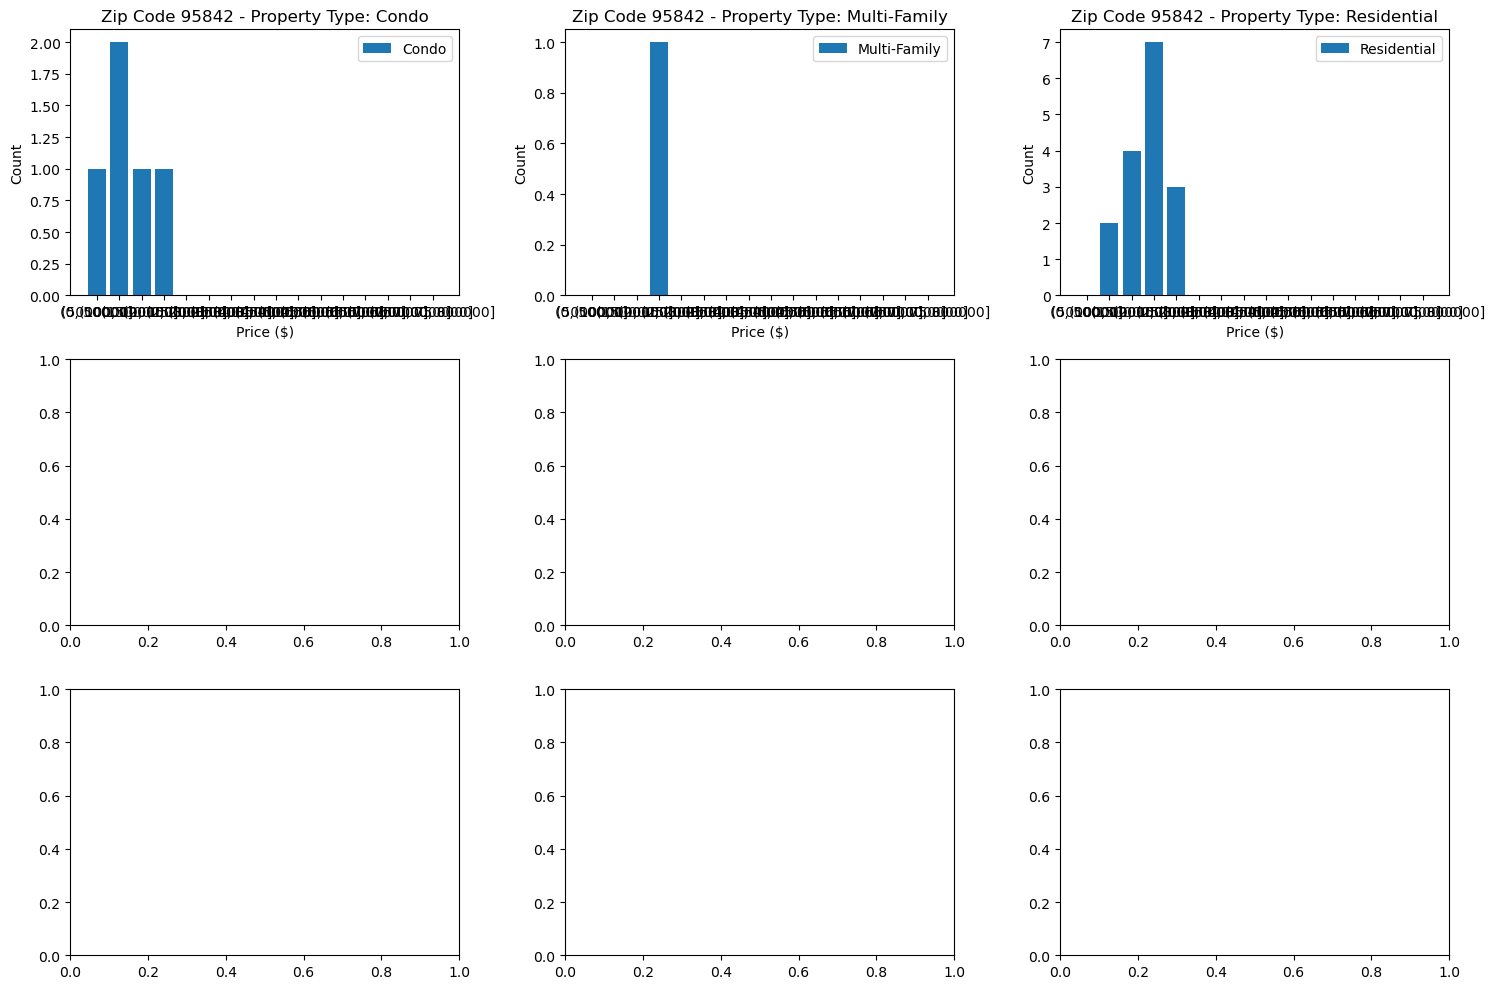

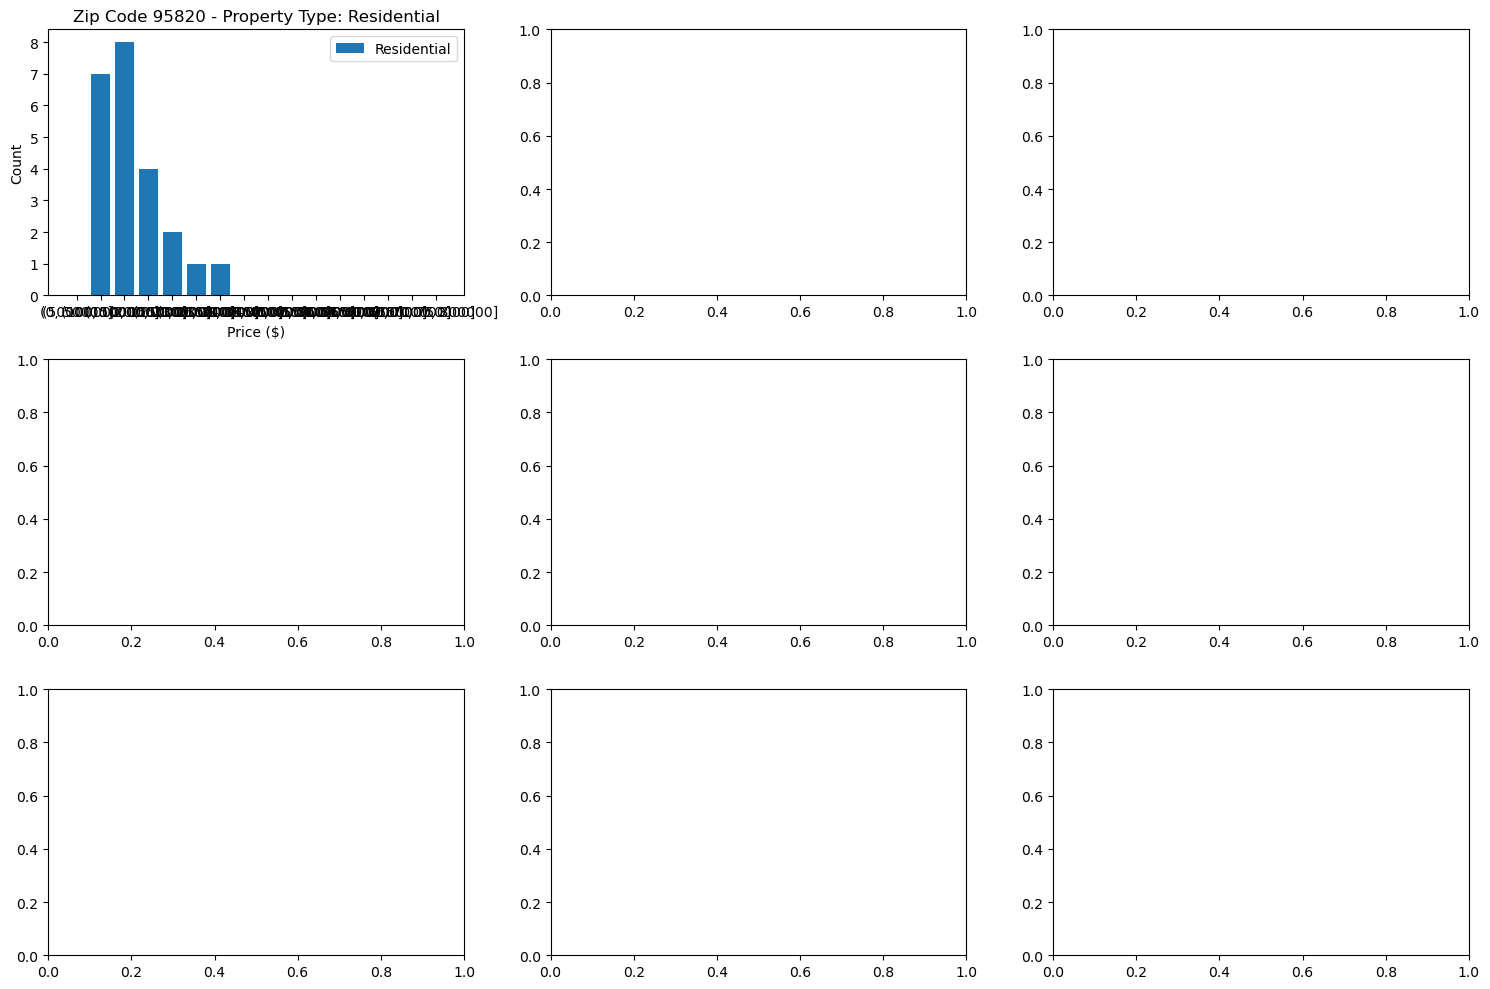

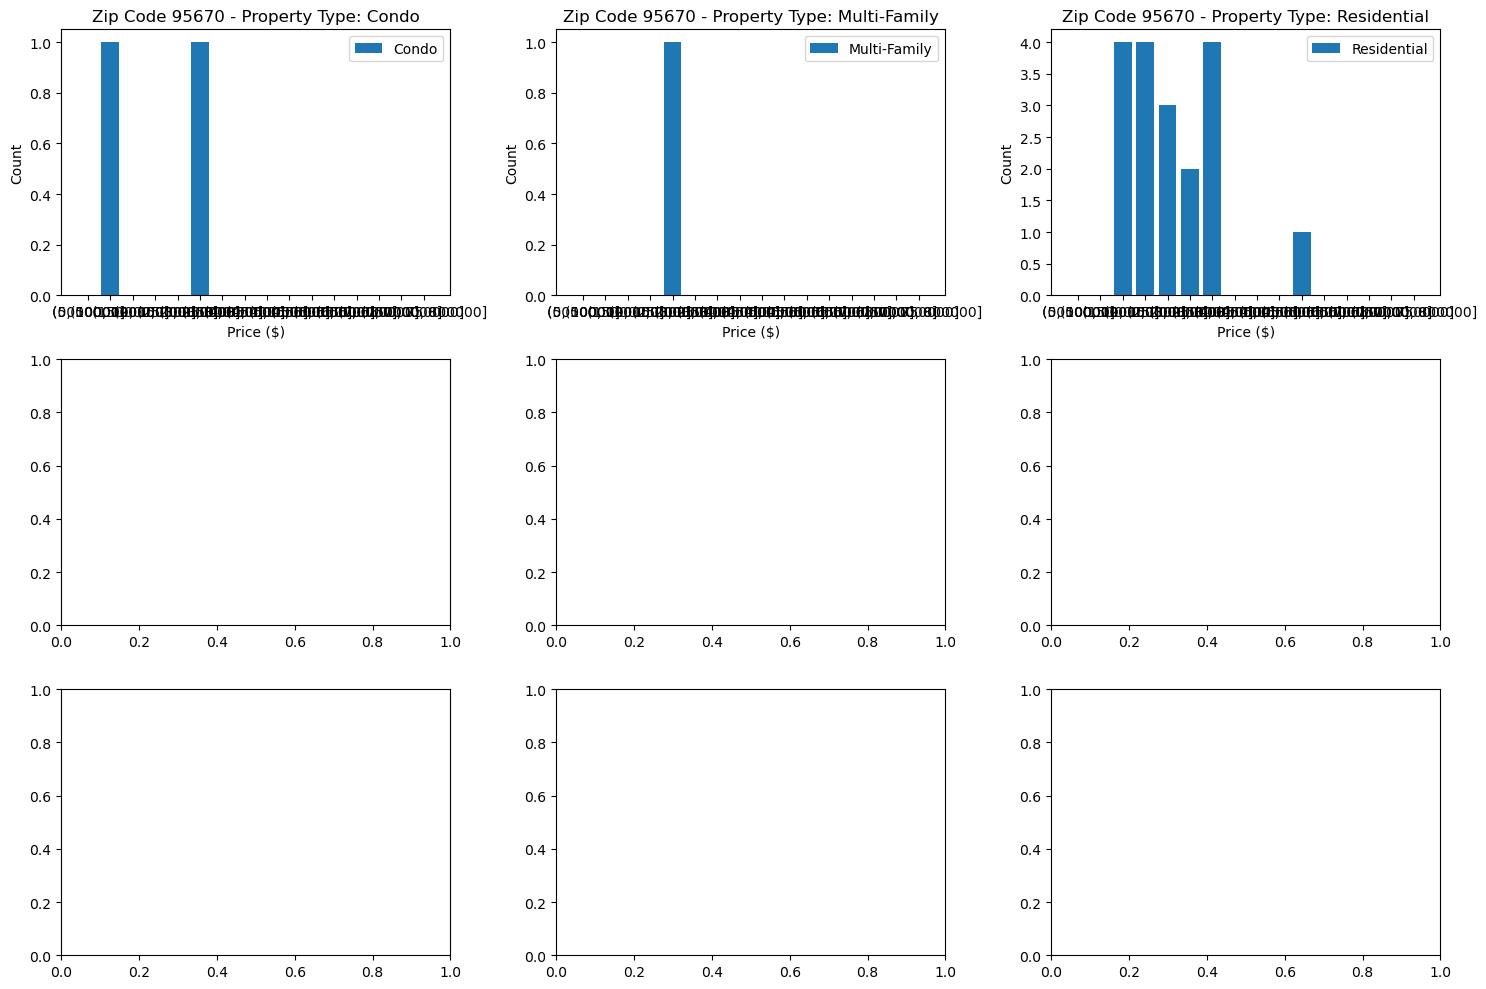

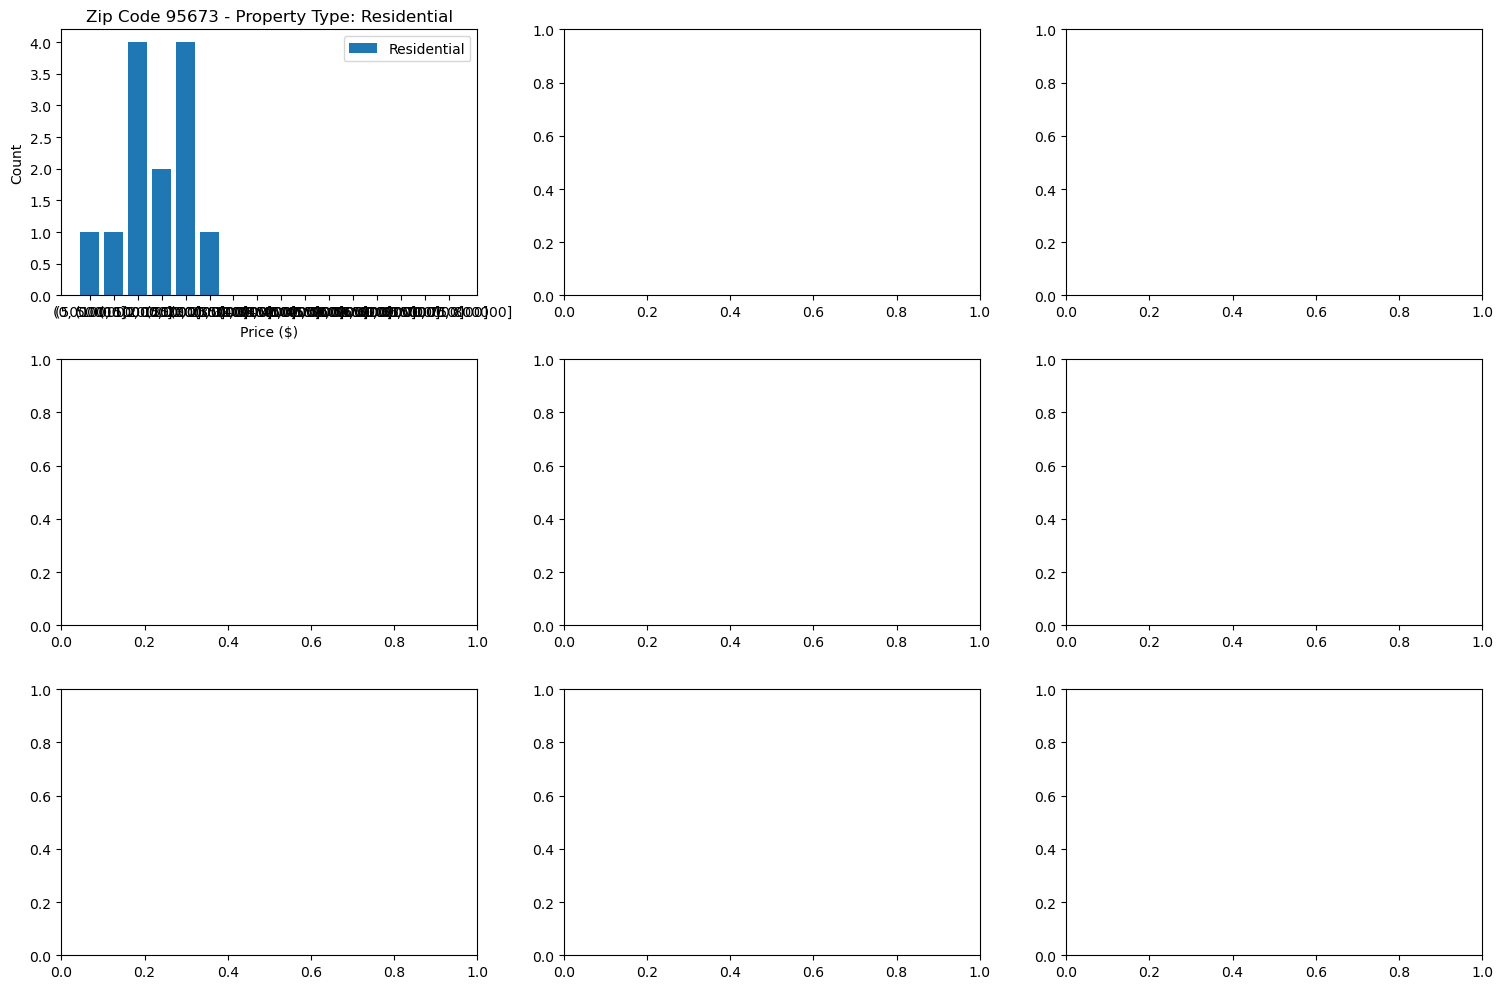

In [7]:
# Get the list of unique zip codes
zip_codes = data['zip'].unique()

# Set up the plot grid
n_rows = 3
n_cols = 3
grid_size = n_rows * n_cols

# Iterate over the zip codes and plot the price distributions grouped by property type
for i, zip_code in enumerate(zip_codes[:grid_size]):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

    # Get the data for the current zip code
    zip_data = data[data['zip'] == zip_code]

    # Group the data by property type and price
    grouped_data = zip_data.groupby(['type', pd.cut(zip_data['price'], bins=range(0, 800001, 50000))])['price'].count().unstack(level=0)

    # Get the list of property types with data
    property_types = grouped_data.columns.dropna()

    # Iterate over the property types and plot the price distributions
    for j, property_type in enumerate(property_types):
        row = j // n_cols
        col = j % n_cols
        ax = axes[row, col]
        ax.bar(grouped_data[property_type].index.astype(str), grouped_data[property_type])
        ax.set_xlabel('Price ($)')
        ax.set_ylabel('Count')
        ax.set_title(f'Zip Code {zip_code} - Property Type: {property_type}')
        ax.legend([property_type])

        # Annotate the highest and lowest price ones for each category of real estate
        highest_price = zip_data.loc[zip_data['type'] == property_type, 'price'].max()
        lowest_price = zip_data.loc[zip_data['type'] == property_type, 'price'].min()
        ax.annotate(f'Highest Price: ${highest_price}', xy=(highest_price, 0), xytext=(highest_price * 1.1, 0), va='center', ha='left', arrowprops=dict(facecolor='black', arrowstyle='-|>'))
        ax.annotate(f'Lowest Price: ${lowest_price}', xy=(lowest_price, 0), xytext=(lowest_price * 0.9, 0), va='center', ha='right', arrowprops=dict(facecolor='black', arrowstyle='-|>'))

    # Set the spacing between the plots
    plt.tight_layout()

    # Display the plot
    plt.show()

### 5) Plot the average price distribution based on zipcode for each category of real estate: condo, residential and multi-family, please also include ticks, labels and legend in your plot

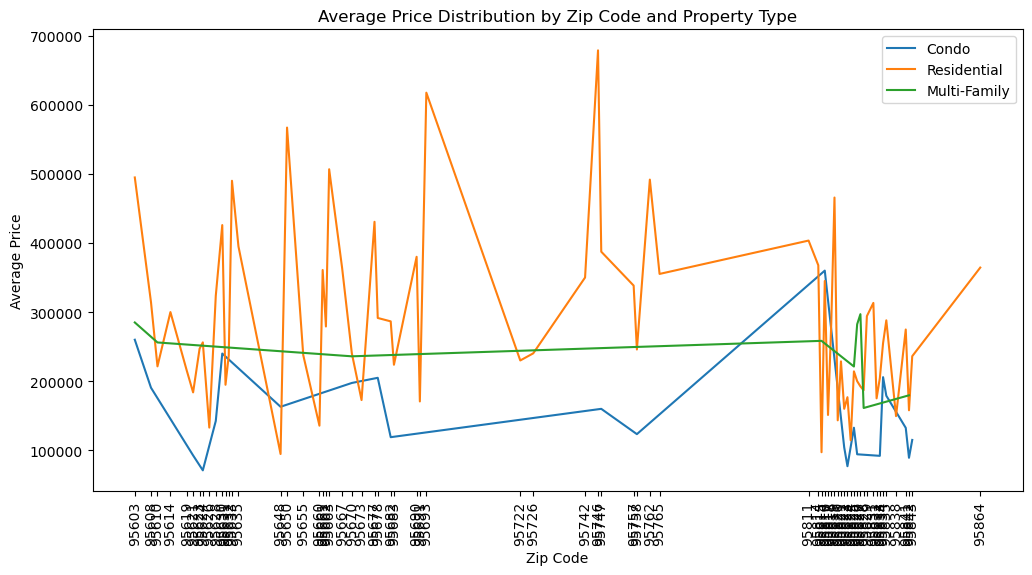

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('Sacramentorealestatetransactions.csv')

# Group the data by zip code and type and calculate the average price
group = df.groupby(['zip', 'type'])['price'].mean().reset_index()

# Separate the data for each type
condo_data = group[group['type'] == 'Condo']
residential_data = group[group['type'] == 'Residential']
multi_family_data = group[group['type'] == 'Multi-Family']

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(condo_data['zip'], condo_data['price'], label='Condo')
plt.plot(residential_data['zip'], residential_data['price'], label='Residential')
plt.plot(multi_family_data['zip'], multi_family_data['price'], label='Multi-Family')
plt.xlabel('Zip Code')
plt.ylabel('Average Price')
plt.title('Average Price Distribution by Zip Code and Property Type')
plt.xticks(df['zip'].unique(), rotation=90)
plt.legend()
plt.show()

### 6) Plot the average price distribution based on city for each category of real estate: condo, residential and multi-family, please also include ticks, labels and legend in your plot

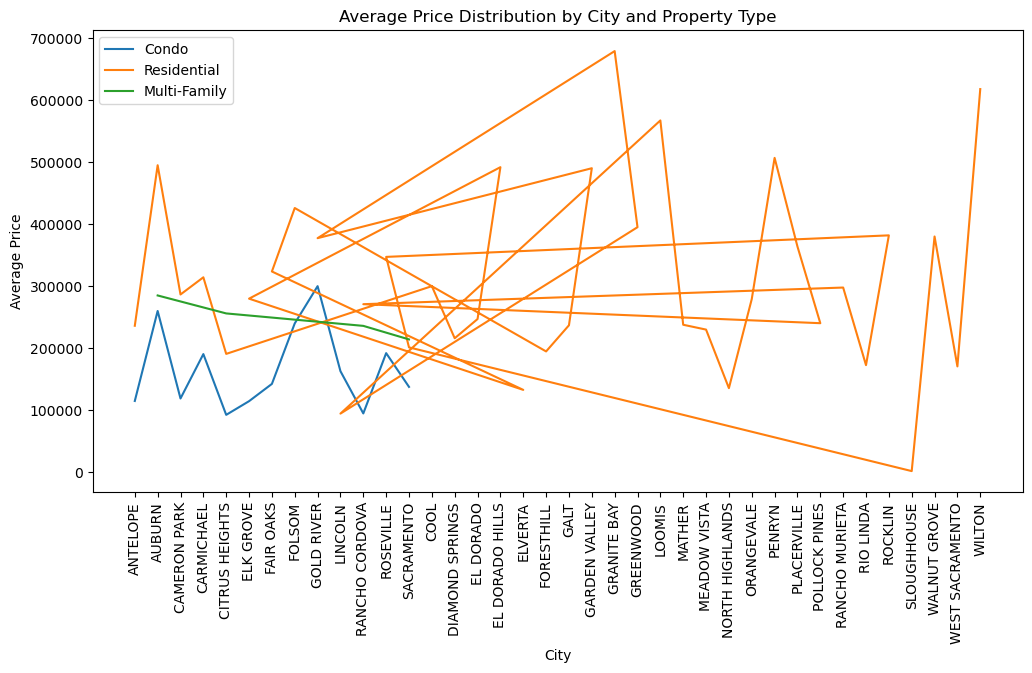

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('Sacramentorealestatetransactions.csv')

# Group the data by zip code and type and calculate the average price
group = df.groupby(['city', 'type'])['price'].mean().reset_index()

# Separate the data for each type
condo_data = group[group['type'] == 'Condo']
residential_data = group[group['type'] == 'Residential']
multi_family_data = group[group['type'] == 'Multi-Family']

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(condo_data['city'], condo_data['price'], label='Condo')
plt.plot(residential_data['city'], residential_data['price'], label='Residential')
plt.plot(multi_family_data['city'], multi_family_data['price'], label='Multi-Family')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.title('Average Price Distribution by City and Property Type')
plt.xticks(rotation=90)
plt.legend()
plt.show()

### SP500.csv file

### 7) Plot daily gain/loss for January of 2018, annotate the highest daily gain and its date, the highestdaily loss and its date in January 2018

### 8) Make pair plot matrix of January 2018 SP500 data on high, low, adj close and volumn